<a href="https://colab.research.google.com/github/techfreakydeepak/Health_insurance_Cross_sell_pediction/blob/main/Health_Inssurance_Cross_Sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

In [ ]:
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

In [ ]:
# Setting option to display all the columns in dataset
pd.set_option("display.max_columns",None)
#from pandas.io.common import is _url
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount("/content/drive")
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Give the path of the folder to access all the csv data files
url='https://drive.google.com/file/d/1BDojWtEMWK615Ye_UHPrFTVTIywl_eas/view?usp=sharing' 
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
# Let's read the csv file
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION=pd.read_csv(url)

Dataset First View

In [ ]:
# check top five rows to get the overview of data
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Dataset Rows & Columns count

In [ ]:
# shape tell us rows and columns
print('the shape of data is - ',df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.shape)

the shape of data is -  (381109, 12)


 * By this we can say that in our dataset 381109 rows and 12 columns

Dataset Information

In [ ]:
# Let's get some information about data
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


 Understanding Your Variables

Variables Description

In [ ]:
# columns Name
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Variables Description

The dataset contains weather information ('id', 'Gender', 'Age', 

'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 

'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', 

'Response')

Attribute Information:

* id : Unique ID for the customer

* Gender : Gender of the customer

* Age : Age of the customer

* Driving_License: 0 - Customer does not have DL, 1 - Customer already has DL

* Region_Code : Unique code for the region of the customer

* Previously_Insured : 1 - Customer already has Vehicle Insurance, 0 - Customer doesn't have Vehicle Insurance

* Vehicle_Age : Age of the Vehicle

* Vehicle_Damage :1 - Customer got his/her vehicle damaged in the past. 0 - Customer didn't get his/her vehicle damaged in the past.

* Annual_Premium : The amount customer needs to pay as premium in the year

* PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* Vintage : Number of Days, Customer has been associated with the company

* Response : 1 : Customer is interested, 0 : Customer is not interested

In [ ]:
 # check description of dataset
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


♦ Here we can divide it into two type

1-Numeric features -- 'Annual_Premium', 'Vintage'

2- Categorical features -- 'id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'

Copy of our dataset

Now we will make a copy of our dataset so that any changes will not affect the original dataset

In [ ]:
# copy of dataset
df=df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.copy()

check, our copied data is perfect or not

In [ ]:
# check top five row of our copied data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Null Values


In [ ]:
# let's check null values 
null_values_in_data=df.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


Here we see there is no any null vlaues in our dataset


Duplicate **Values** ***

In [ ]:
# let's check duplicate values in our dataset
len(df[df.duplicated()])

0

we find there is no any duplicate value



 Now Drop "ID" column. Because it is not useful for us

In [ ]:
#drop id column
df.drop("id",inplace=True,axis=1)

In [ ]:
# now check columns after drop id column
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Check Unique Values

let's find unique value of each column

In [ ]:
### let's Now Check Unique Values 
for col in df.columns:
    print(f"{col}: ")
    print("")
    print(df[col].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# EDA

Now check the distribution of our independent variable

<ipython-input-38-18f036739b37>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-38-18f036739b37>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-38-18f036739b37>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

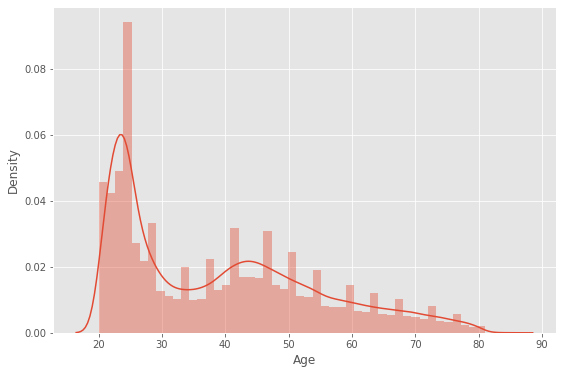

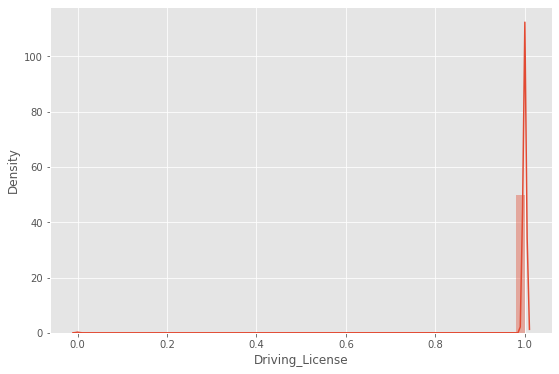

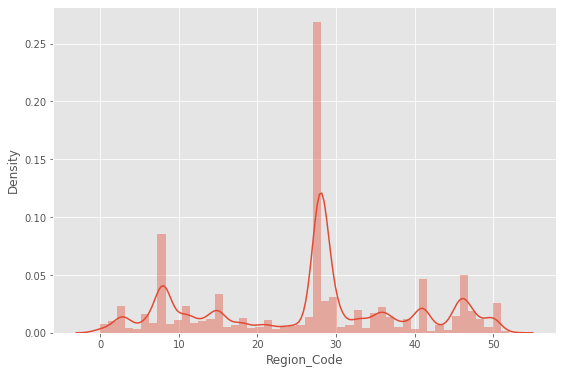

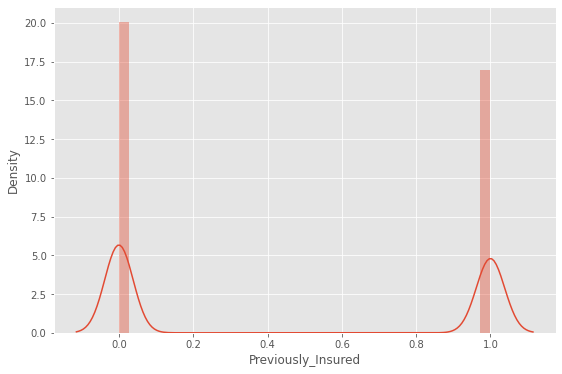

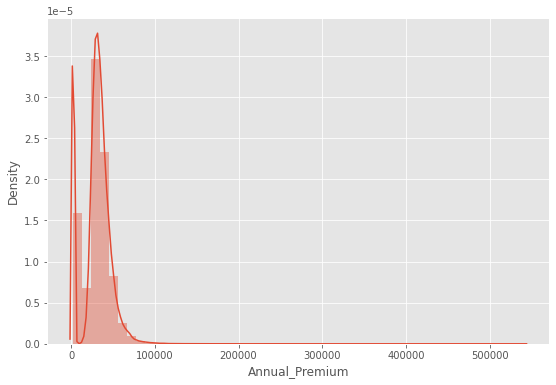

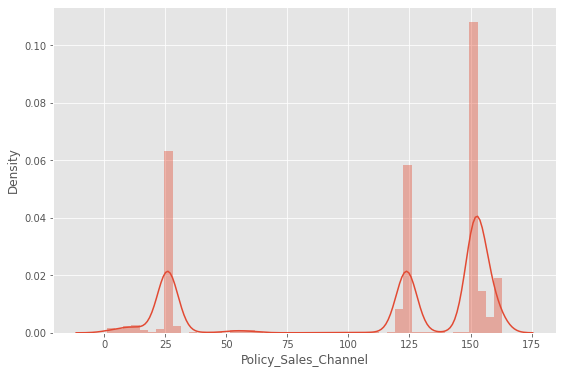

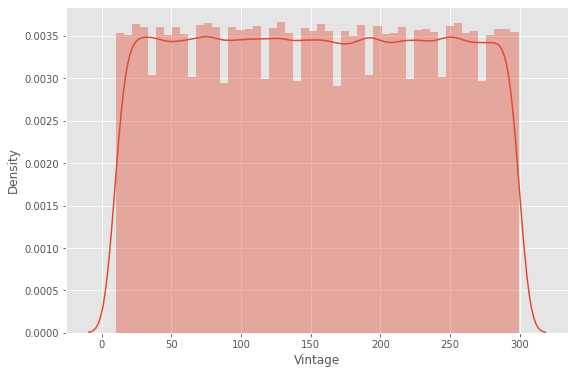

In [ ]:
# Distribution of features
for col in df.describe():
  if col=="Response":
      pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.distplot(df[col])

Here we can see that some of the features are not perfectly distributed. Further we'll fix it

Now we will see the distribution of our numerical features about Mean and median

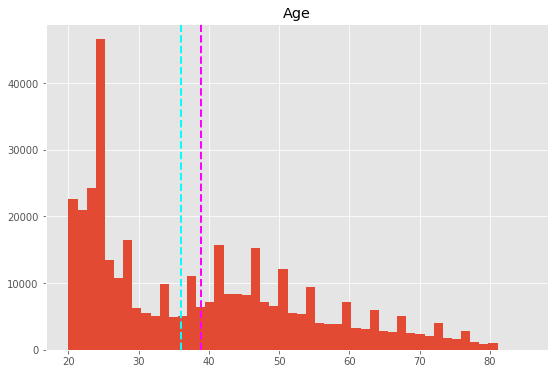

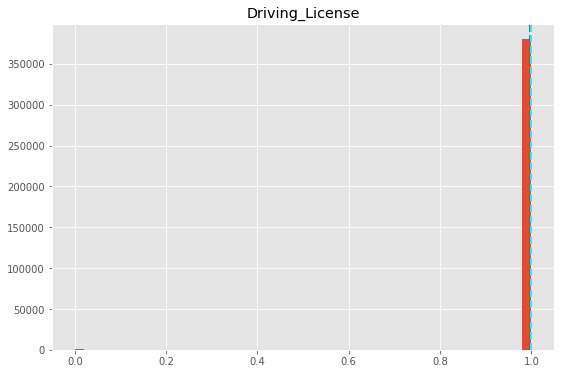

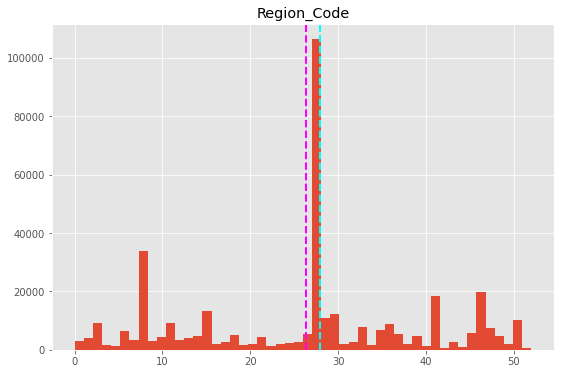

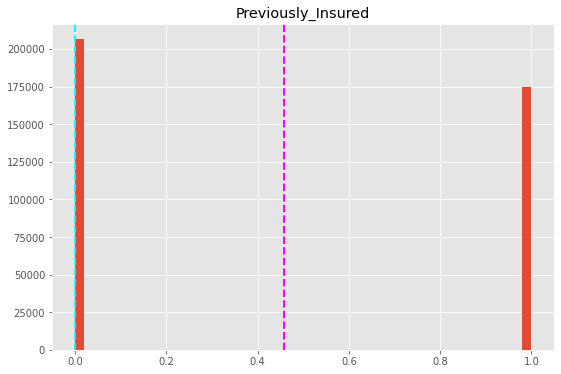

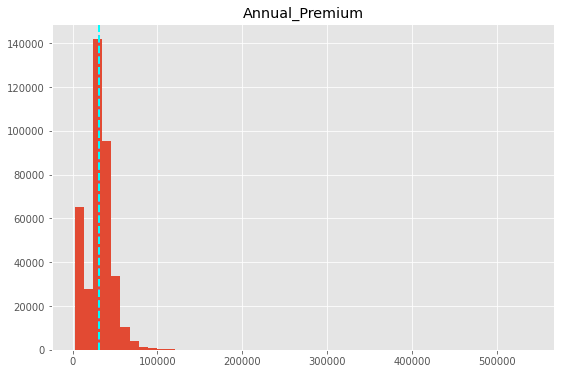

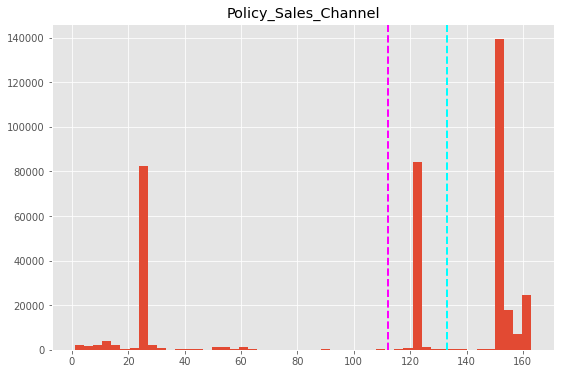

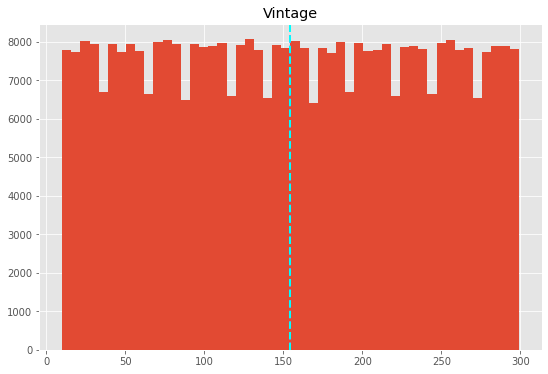

In [ ]:
# distribution about mean and median
for col in df.describe():
  if col=='Response':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# CHECK OUTLIERS

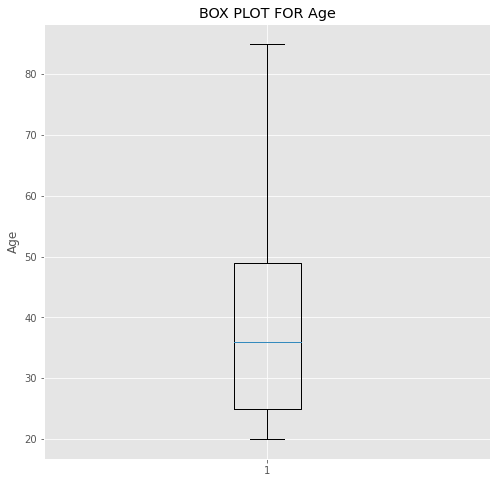

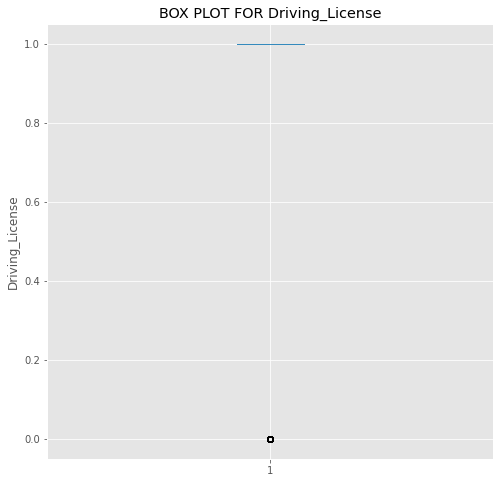

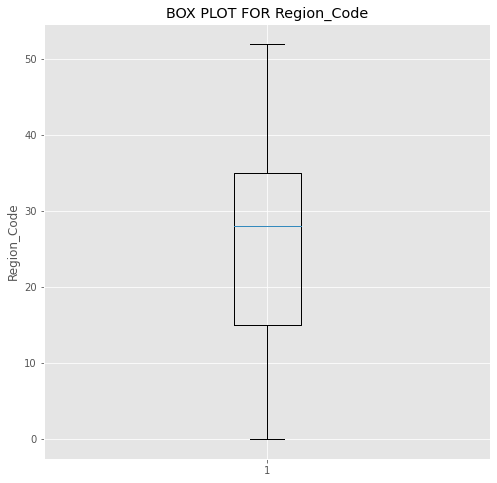

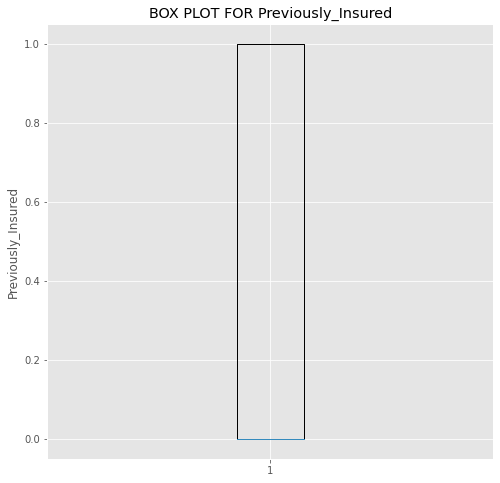

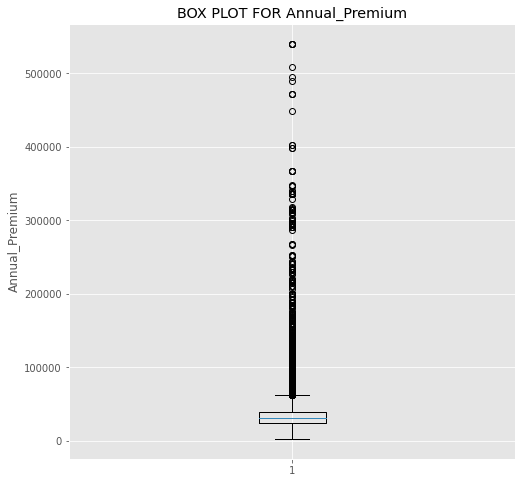

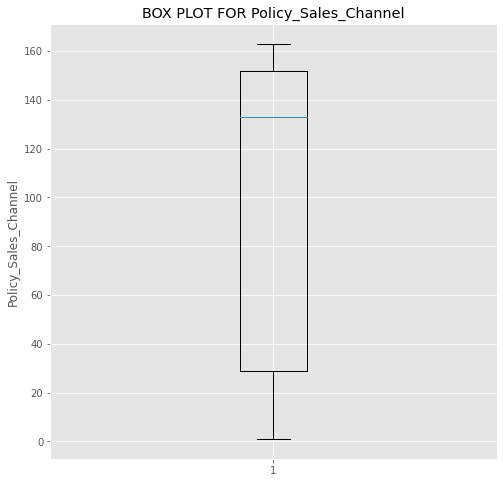

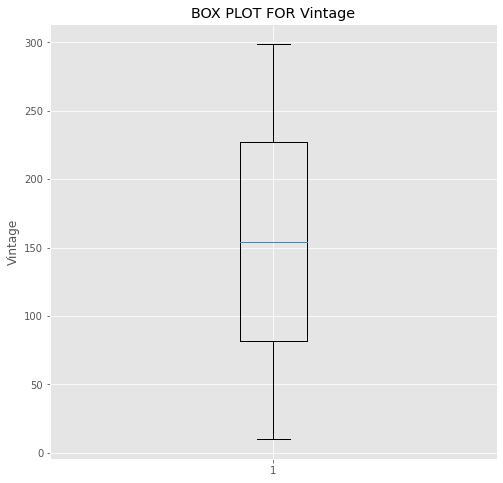

In [ ]:
# Box plot for numeric features
for col in df.describe():
  if col=='Response':
    pass
  else:
         plt.figure(figsize=(8,8))
         plt.boxplot(df[col])
         plt.ylabel(col)
         plt.title(f'BOX PLOT FOR {col}');
         

In above box plot we can see that there is some outliers in 'Annual_Premium' column

# Let's remove outliers

In [ ]:
# find  q1  and q3 for outliers column
q1=df['Annual_Premium'].quantile(0.25)
q3=df['Annual_Premium'].quantile(0.75)
print(q1)
print(q3)

24405.0
39400.0


In [ ]:
# find iqr for outlier columns
IQR=q3-q1
Lower_Whisker = q1-1.5*IQR
Upper_Whisker = q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

1912.5
61892.5


In [ ]:
# for removing outliers, we remove those rows in  which 'Annual_Premium' above to Upper_Whisker and below the Lower_Whisker
df=df[df['Annual_Premium']>Lower_Whisker]
df=df[df['Annual_Premium']<Upper_Whisker]

# Remove some unnecessary data



In [ ]:
# check,how many people already have insurance and they respond yes
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'])

Response,0,1
Previously_Insured,,
0,155349,45001
1,170285,154


Here we can see that 154 people already have insurance, but those people are responding yes. If you have already had insurance, there is no need for reinsurance.we have to remove those rows

In [ ]:
# drop those rows where 'Previously_Insured' is yes and 'Response' is yes
df = df.drop(df[(df['Previously_Insured']==1) & (df['Response']==1)].index)


In [ ]:
# let's check our data after removing outliers and unnecessary data
df.shape

(370635, 11)

After removing outliers and unnecessary data we have 370635 rows and 14 columns

# Now let's do EDA in categorical data

In [ ]:
#function for Calculate the percentage of each unique value in  column
def count(col):
  count = df[col].value_counts()

# Calculate the percentage of each unique value in that particular column
  percent = count / len(df) * 100
  count_df = pd.concat([count,  percent], axis=1, keys=['Count', 'Percentage'])

 
  print(count_df)
  plt.figure(figsize = (10, 5))
  percent.plot.pie(labels=percent.index, autopct='%.2f%%')


  plt.show()

         Count  Percentage
Male    200226   54.022421
Female  170409   45.977579


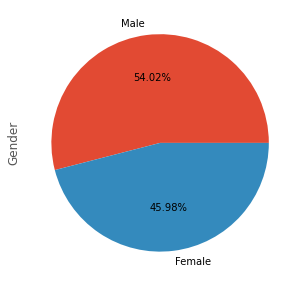

In [ ]:
# Gender
count('Gender')

We can see that approx 54% of the customer of the health insurance is male and approx 46% of the customer of the health insurance is female so we can sey that male are more intersted in insurance



    Count  Percentage
1  369872   99.794137
0     763    0.205863


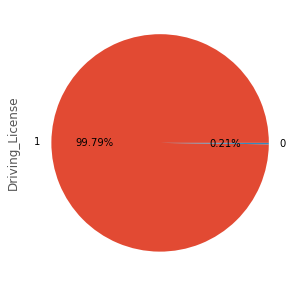

In [ ]:
# Driving license
count('Driving_License')

We can see that almost 100% people have diving license.

In [ ]:
# age mean value 
df['Age'].mean()

38.67153129089266

The average age for health insurance customers is around 38 - 39. so we can say that customers whose age is around 38-39 are more intrested in insurance



    Count  Percentage
0  200350   54.055877
1  170285   45.944123


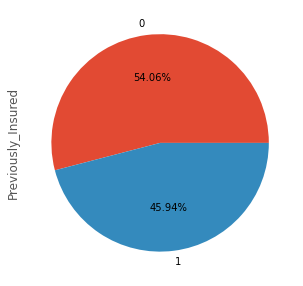

In [ ]:
# percentage of Previously Insured
count('Previously_Insured')

Here we can see that approx 54% of the customers does not have a vehicle insurance. so they will be more intrested in vehical insurence

In [ ]:
# percentage of Vehicle Age
count('Vehicle_Age')

We can see that 55% of the customers who have health insurance have 1-2 years old car,and 43.57% have new car and 4% have old car

In [ ]:
# percentage of Vehicle_Damage
count('Vehicle_Damage')

Half of the health insurance customer have had their vehicle damaged and half have not




In [ ]:
# percentage of Response
count('Response')

12.14% of the health insurance customer are intrested on vehicle insurance

# Since our target column is response first we are going to crosstab the response column with all the feature.



▶ Response with respect to Gender

In [ ]:
 # gender and response 
pd.crosstab(index = df['Response'], columns = df['Gender'], normalize='index')
 
 

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Gender'], hue = df['Response']);

♦ Male are more likely to be interested to vehicle insurance compared to women

♦ 61% of interested response are from male respondents

▶ Response with respect to Previously Insured



In [ ]:
# Previously Insured and  response 
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'])

Here 45001 people whom don't have vehicle insurance are taking insurence

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Previously_Insured'], hue = df['Response']);

almost every customer who already have a vehicle insurance is not interested with another vehicle insurance

out of all customer who does not have a vehicle insurance almost a quarter of them are intersted with vehicle insurance

▶ Response with respect to 'Vehicle_Damage'

In [ ]:
# Vehicle_Damage and Response
pd.crosstab(index = df['Response'], columns = df['Vehicle_Damage'], normalize='index')

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Vehicle_Damage'], hue = df['Response']);

♦ customer who're intersted in vehicle insurance 98% have had a vehicle damage in the past

▶ Response with respect to Age

In [ ]:
# Age and Response
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response']);

♦ so we can say that customers whose age is around 32-57 are more intrested in insurance

▶ Divide Age Group into three part

In [ ]:
# three age group  are young age, middle age, old age
df['Age_Group'] = df['Age'].apply(lambda x:'Young_Age' if x >= 20 and x<=40 else 'Middle_Age' if x>40 and x<=60 else 'Old_Age')